In [1]:
# Animal classification
# https://www.kaggle.com/stpeteishii/animal-detection-by-yolo-coco-model

In [4]:
import math
import os

import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image
from tensorflow.keras import layers
from tqdm import tqdm

In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
basedir = "archive/raw-img/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    basedir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    basedir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 26179 files belonging to 10 classes.
Using 5235 files for validation.


In [8]:
for x, y in train_ds.take(1):
    print(x.shape)
    print(y.shape)

(32, 180, 180, 3)
(32,)


2021-08-31 23:02:06.482602: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-31 23:02:06.604431: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


In [9]:
class_names = train_ds.class_names
print(class_names)

['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


In [112]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [118]:
model = tf.keras.Sequential(
    [
        layers.experimental.preprocessing.Rescaling(
            1.0 / 255, input_shape=(img_height, img_width, 3)
        ),
        layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.Conv2D(128, 3, activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 3, activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation="relu"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(len(class_names), activation="softmax"),
    ]
)

In [119]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [120]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 160, 160, 3)       0         
_________________________________________________________________
random_flip_4 (RandomFlip)   (None, 160, 160, 3)       0         
_________________________________________________________________
random_rotation_4 (RandomRot (None, 160, 160, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 158, 158, 128)     3584      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 79, 79, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 77, 77, 128)       147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 38, 38, 128)      

In [121]:
model.fit(train_ds, validation_data=val_ds, epochs=10, batch_size=batch_size)

Epoch 1/10
655/655 [==============================] - 20s 30ms/step - loss: 1.9532 - accuracy: 0.3123 - val_loss: 1.6814 - val_accuracy: 0.4122
Epoch 2/10
655/655 [==============================] - 20s 30ms/step - loss: 1.5931 - accuracy: 0.4500 - val_loss: 1.5880 - val_accuracy: 0.4506
Epoch 3/10
655/655 [==============================] - 20s 30ms/step - loss: 1.3968 - accuracy: 0.5197 - val_loss: 1.3207 - val_accuracy: 0.5387
Epoch 4/10
655/655 [==============================] - 19s 29ms/step - loss: 1.2714 - accuracy: 0.5648 - val_loss: 1.3111 - val_accuracy: 0.5417
Epoch 5/10
655/655 [==============================] - 19s 29ms/step - loss: 1.1925 - accuracy: 0.5929 - val_loss: 1.2272 - val_accuracy: 0.5838
Epoch 6/10
655/655 [==============================] - 19s 29ms/step - loss: 1.1257 - accuracy: 0.6158 - val_loss: 1.1480 - val_accuracy: 0.6082
Epoch 7/10
655/655 [==============================] - 19s 30ms/step - loss: 1.0817 - accuracy: 0.6296 - val_loss: 1.1726 - val_accuracy:

In [122]:
loss, acc = model.evaluate(val_ds)
print("Accuracy", acc)

164/164 [==============================] - 2s 11ms/step - loss: 1.0586 - accuracy: 0.6386
Accuracy 0.6385864615440369


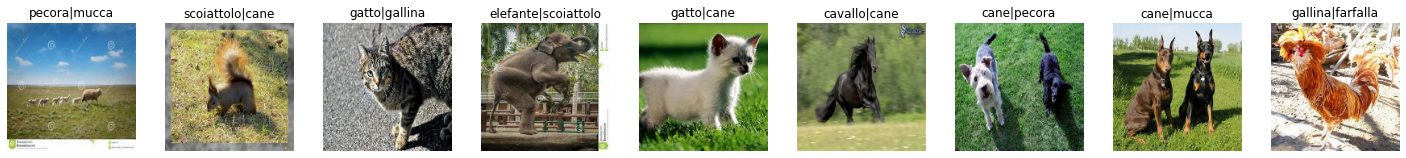

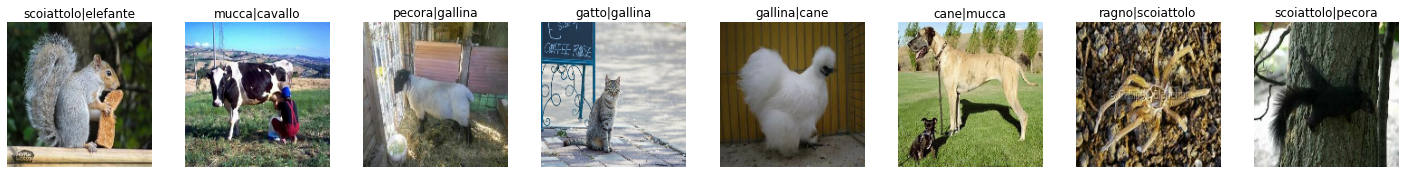

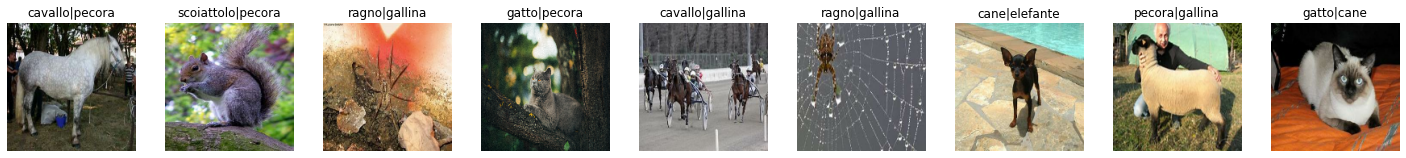

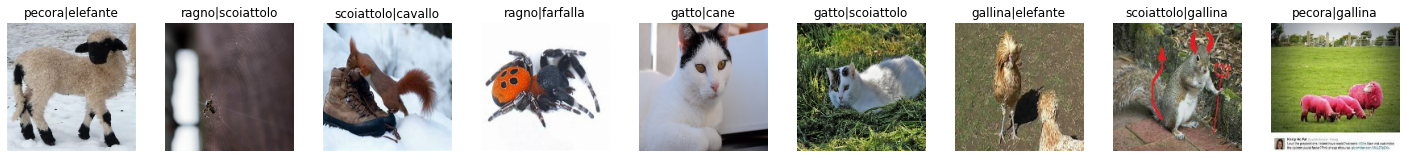

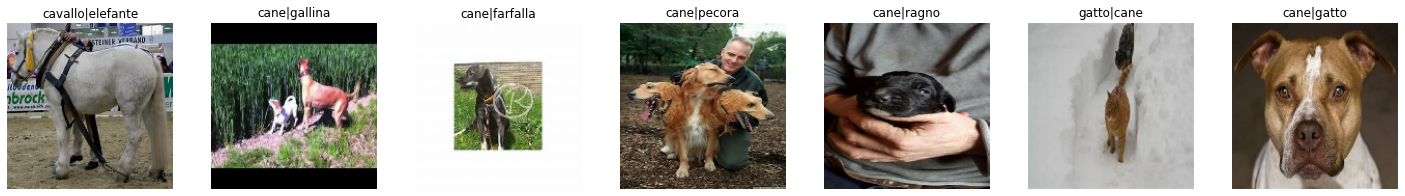

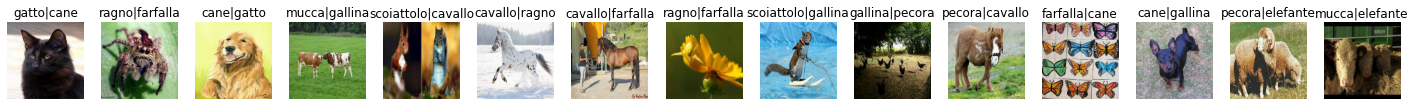

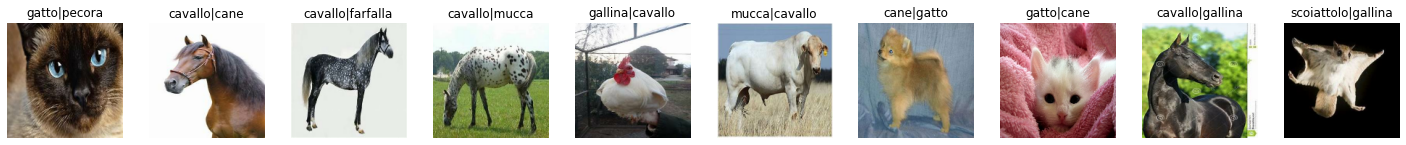

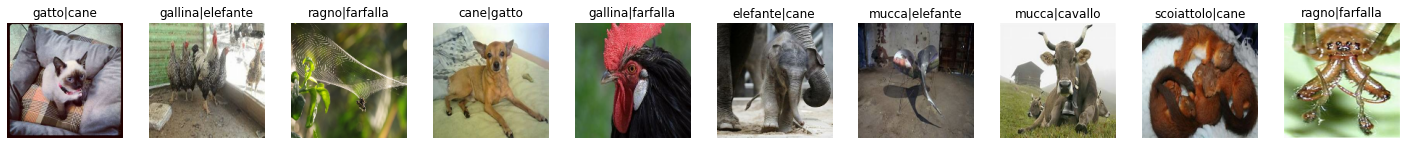

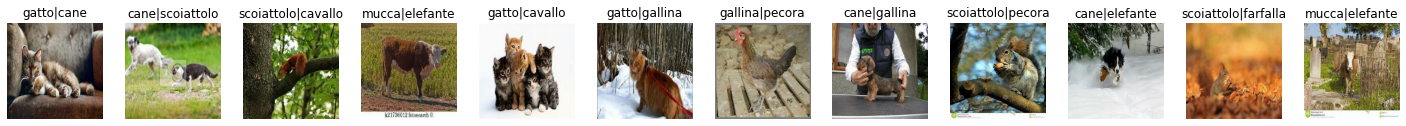

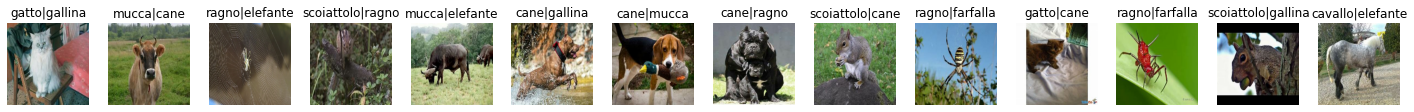

In [123]:
import matplotlib.pyplot as plt

for images, labels in train_ds.take(10):

    fig = plt.figure(figsize=(25, 25))
    pred_prob = [(np.argmax(p), max(p)) for p in model.predict(images)]
    predictions = [class_names[a[0]] for a in pred_prob]
    expected = [class_names[a] for a in labels]
    not_match = [i for i in range(len(predictions)) if predictions[i] != expected[i]]
    rows = columns = int(math.ceil(len(not_match)))
    for i in range(len(not_match)):
        fig.add_subplot(rows, columns, i + 1)
        plt.imshow(images[not_match[i]].numpy().astype("uint8"))
        plt.title("{}|{}".format(expected[not_match[i]], predictions[not_match[i]]))
        plt.axis("off")

In [124]:
batch_size = 32
img_height = 160
img_width = 160

In [125]:
basedir = "archive/raw-img/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    basedir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 26179 files belonging to 10 classes.
Using 20944 files for training.


In [126]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    basedir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 26179 files belonging to 10 classes.
Using 5235 files for validation.


In [188]:
IMG_SHAPE = (img_height, img_width, 3)
base_model = tf.keras.applications.xception.Xception(
    input_shape=IMG_SHAPE, include_top=False, weights="imagenet"
)
base_model.trainable = False
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_44 (InputLayer)           [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 79, 79, 32)   864         input_44[0][0]                   
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 79, 79, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 79, 79, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [192]:
data_augmentation = tf.keras.Sequential(
    [
        #         layers.experimental.preprocessing.Rescaling(1.0 / 255, input_shape=IMG_SHAPE),
        layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

In [193]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = data_augmentation(inputs)
x = tf.keras.applications.xception.preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(len(class_names), activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"],
)
model.summary()

Model: "model_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_46 (InputLayer)        [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential_22 (Sequential)   (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv_15 (TFOpLamb (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract_15 (TFOpLam (None, 160, 160, 3)       0         
_________________________________________________________________
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_21  (None, 2048)              0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 2048)              0  

In [194]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

 59/655 [=>............................] - ETA: 18s - loss: 0.4802 - accuracy: 0.8448

2021-09-01 00:32:03.055576: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/655 [===>..........................] - ETA: 17s - loss: 0.4696 - accuracy: 0.8495

2021-09-01 00:32:04.229516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


137/655 [=====>........................] - ETA: 15s - loss: 0.4663 - accuracy: 0.8508

2021-09-01 00:32:05.490141: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/655 [=====>........................] - ETA: 15s - loss: 0.4667 - accuracy: 0.8491

2021-09-01 00:32:05.887058: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2021-09-01 00:32:06.084747: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


181/655 [=======>......................] - ETA: 14s - loss: 0.4834 - accuracy: 0.8448

2021-09-01 00:32:06.781030: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


205/655 [========>.....................] - ETA: 13s - loss: 0.4848 - accuracy: 0.8447

2021-09-01 00:32:07.526636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


261/655 [==========>...................] - ETA: 12s - loss: 0.4844 - accuracy: 0.8422

2021-09-01 00:32:09.220044: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


301/655 [============>.................] - ETA: 10s - loss: 0.4826 - accuracy: 0.8423

2021-09-01 00:32:10.454247: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


357/655 [===============>..............] - ETA: 9s - loss: 0.4853 - accuracy: 0.8425

2021-09-01 00:32:12.149230: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


441/655 [===================>..........] - ETA: 6s - loss: 0.4769 - accuracy: 0.8437

2021-09-01 00:32:14.743860: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


489/655 [=====================>........] - ETA: 5s - loss: 0.4740 - accuracy: 0.8453

2021-09-01 00:32:16.209404: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2021-09-01 00:32:16.301330: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


507/655 [======================>.......] - ETA: 4s - loss: 0.4724 - accuracy: 0.8453

2021-09-01 00:32:16.765226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


523/655 [======================>.......] - ETA: 4s - loss: 0.4743 - accuracy: 0.8448

2021-09-01 00:32:17.252852: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


559/655 [========================>.....] - ETA: 2s - loss: 0.4756 - accuracy: 0.8451

2021-09-01 00:32:18.329778: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


607/655 [==========================>...] - ETA: 1s - loss: 0.4743 - accuracy: 0.8458

2021-09-01 00:32:19.794507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


655/655 [==============================] - ETA: 0s - loss: 0.4747 - accuracy: 0.8453

2021-09-01 00:32:21.462640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2021-09-01 00:32:21.979806: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2021-09-01 00:32:22.454875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2021-09-01 00:32:25.246920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


655/655 [==============================] - 25s 38ms/step - loss: 0.4747 - accuracy: 0.8453 - val_loss: 0.2072 - val_accuracy: 0.9339
Epoch 9/10
  5/655 [..............................] - ETA: 19s - loss: 0.5455 - accuracy: 0.8188

2021-09-01 00:32:26.178469: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 59/655 [=>............................] - ETA: 18s - loss: 0.4987 - accuracy: 0.8395

2021-09-01 00:32:27.807377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/655 [===>..........................] - ETA: 17s - loss: 0.4779 - accuracy: 0.8399

2021-09-01 00:32:28.959559: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


137/655 [=====>........................] - ETA: 15s - loss: 0.4547 - accuracy: 0.8483

2021-09-01 00:32:30.201373: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/655 [=====>........................] - ETA: 15s - loss: 0.4520 - accuracy: 0.8495

2021-09-01 00:32:30.587476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2021-09-01 00:32:30.784505: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


181/655 [=======>......................] - ETA: 14s - loss: 0.4685 - accuracy: 0.8455

2021-09-01 00:32:31.453188: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


205/655 [========>.....................] - ETA: 13s - loss: 0.4679 - accuracy: 0.8470

2021-09-01 00:32:32.183142: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


261/655 [==========>...................] - ETA: 11s - loss: 0.4757 - accuracy: 0.8434

2021-09-01 00:32:33.835253: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


301/655 [============>.................] - ETA: 10s - loss: 0.4750 - accuracy: 0.8419

2021-09-01 00:32:35.055962: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


357/655 [===============>..............] - ETA: 8s - loss: 0.4803 - accuracy: 0.8411

2021-09-01 00:32:36.719496: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


441/655 [===================>..........] - ETA: 6s - loss: 0.4711 - accuracy: 0.8444

2021-09-01 00:32:39.256742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


489/655 [=====================>........] - ETA: 4s - loss: 0.4726 - accuracy: 0.8444

2021-09-01 00:32:40.680854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2021-09-01 00:32:40.771155: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


507/655 [======================>.......] - ETA: 4s - loss: 0.4709 - accuracy: 0.8447

2021-09-01 00:32:41.223530: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


523/655 [======================>.......] - ETA: 3s - loss: 0.4725 - accuracy: 0.8440

2021-09-01 00:32:41.702376: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


559/655 [========================>.....] - ETA: 2s - loss: 0.4737 - accuracy: 0.8436

2021-09-01 00:32:42.784918: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


607/655 [==========================>...] - ETA: 1s - loss: 0.4737 - accuracy: 0.8444

2021-09-01 00:32:44.227436: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


655/655 [==============================] - ETA: 0s - loss: 0.4750 - accuracy: 0.8443

2021-09-01 00:32:45.871060: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2021-09-01 00:32:46.402078: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2021-09-01 00:32:46.884419: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2021-09-01 00:32:49.705043: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


655/655 [==============================] - 24s 37ms/step - loss: 0.4750 - accuracy: 0.8443 - val_loss: 0.2097 - val_accuracy: 0.9343
Epoch 10/10
  5/655 [..............................] - ETA: 19s - loss: 0.4666 - accuracy: 0.8438

2021-09-01 00:32:50.599311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 59/655 [=>............................] - ETA: 18s - loss: 0.4213 - accuracy: 0.8575

2021-09-01 00:32:52.226181: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 97/655 [===>..........................] - ETA: 16s - loss: 0.4337 - accuracy: 0.8553

2021-09-01 00:32:53.370635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


137/655 [=====>........................] - ETA: 15s - loss: 0.4282 - accuracy: 0.8586

2021-09-01 00:32:54.620600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


151/655 [=====>........................] - ETA: 15s - loss: 0.4380 - accuracy: 0.8572

2021-09-01 00:32:55.008921: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2021-09-01 00:32:55.204567: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


181/655 [=======>......................] - ETA: 14s - loss: 0.4456 - accuracy: 0.8543

2021-09-01 00:32:55.893573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


205/655 [========>.....................] - ETA: 13s - loss: 0.4433 - accuracy: 0.8543

2021-09-01 00:32:56.628884: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


261/655 [==========>...................] - ETA: 11s - loss: 0.4562 - accuracy: 0.8518

2021-09-01 00:32:58.268919: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


301/655 [============>.................] - ETA: 10s - loss: 0.4627 - accuracy: 0.8495

2021-09-01 00:32:59.477904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


357/655 [===============>..............] - ETA: 8s - loss: 0.4704 - accuracy: 0.8475

2021-09-01 00:33:01.141940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


441/655 [===================>..........] - ETA: 6s - loss: 0.4711 - accuracy: 0.8485

2021-09-01 00:33:03.702515: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


489/655 [=====================>........] - ETA: 4s - loss: 0.4692 - accuracy: 0.8500

2021-09-01 00:33:05.124503: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2021-09-01 00:33:05.213689: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


507/655 [======================>.......] - ETA: 4s - loss: 0.4672 - accuracy: 0.8503

2021-09-01 00:33:05.661259: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


523/655 [======================>.......] - ETA: 3s - loss: 0.4672 - accuracy: 0.8500

2021-09-01 00:33:06.136915: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


559/655 [========================>.....] - ETA: 2s - loss: 0.4701 - accuracy: 0.8495

2021-09-01 00:33:07.215143: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


607/655 [==========================>...] - ETA: 1s - loss: 0.4669 - accuracy: 0.8506

2021-09-01 00:33:08.664335: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


655/655 [==============================] - ETA: 0s - loss: 0.4690 - accuracy: 0.8505

2021-09-01 00:33:10.363137: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2021-09-01 00:33:10.886354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2021-09-01 00:33:11.362068: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2021-09-01 00:33:14.163640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


655/655 [==============================] - 24s 37ms/step - loss: 0.4690 - accuracy: 0.8505 - val_loss: 0.2213 - val_accuracy: 0.9339


In [142]:
# top_model = base_model.output
# top_model = layers.Flatten(name="flatten")(top_model)
# top_model = layers.Dense(4096, activation="relu")(top_model)
# top_model = layers.Dense(1072, activation="relu")(top_model)
# top_model = layers.Dropout(0.2)(top_model)


# # Group the convolutional base and new fully-connected layers into a Model object.
# model = Model(inputs=base_model.input, outputs=output_layer)

# # Compiles the model for training.
# model.compile(
#     optimizer="adam",
#     loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics=["accuracy"],
# )

In [195]:
initial_epochs = 2
loss0, accuracy0 = model.evaluate(val_ds)

# VGG19 = 0.1819
# VGG16 = 0.2330
# XCeption = 0.2430

  5/164 [..............................] - ETA: 5s - loss: 0.1915 - accuracy: 0.9563

2021-09-01 00:48:07.245186: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 25/164 [===>..........................] - ETA: 4s - loss: 0.2030 - accuracy: 0.9413

2021-09-01 00:48:07.827922: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 41/164 [======>.......................] - ETA: 3s - loss: 0.2135 - accuracy: 0.9337

2021-09-01 00:48:08.313796: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


143/164 [=========================>....] - ETA: 0s - loss: 0.2206 - accuracy: 0.9338

2021-09-01 00:48:11.155589: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


164/164 [==============================] - 5s 29ms/step - loss: 0.2213 - accuracy: 0.9339


In [ ]:
history = model.fit(train_ds, epochs=initial_epochs, validation_data=val_ds)